# Mundo 9 - Configurar cores no matplotlib

https://matplotlib.org/stable/tutorials/colors/colors.html#sphx-glr-tutorials-colors-colors-py

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import yfinance as yf

In [2]:
cotacoes = yf.download(["WEGE3.SA"])['Close']

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


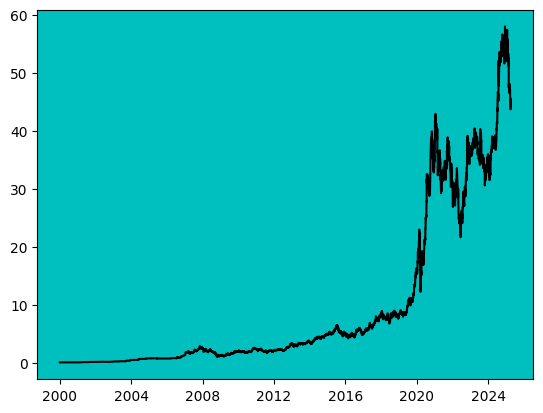

In [3]:
#trocando a cor pelo nome

fig, ax = plt.subplots()

ax.plot(cotacoes.index, cotacoes.values, color = "black")
ax.set_facecolor('c')

# Cores por código

https://www.hexcolortool.com/#42eaf0

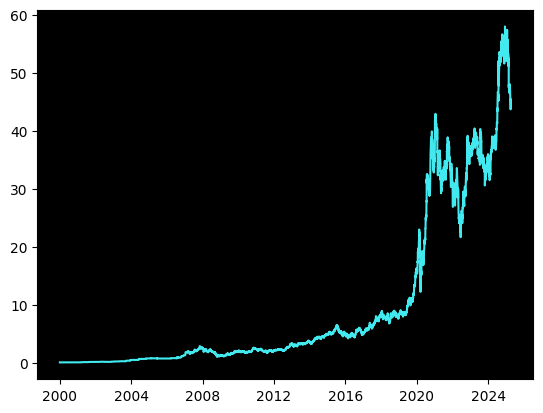

In [4]:
#trocando a cor pelo código da cor

fig, ax = plt.subplots()

ax.plot(cotacoes.index, cotacoes.values, color = "#42eaf0")
ax.set_facecolor('black')

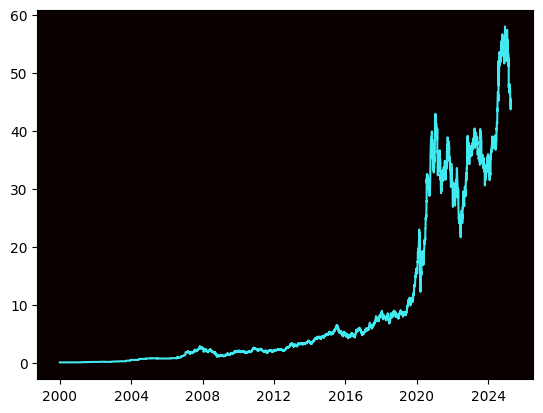

In [5]:
#trocando a cor pelo número da cor

fig, ax = plt.subplots()

ax.plot(cotacoes.index, cotacoes.values, color = (65/255, 234/255, 240/255))
ax.set_facecolor((10/255, 0/255, 0/255))



# Configurando cores por estilos

https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html

In [6]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'petroff10',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

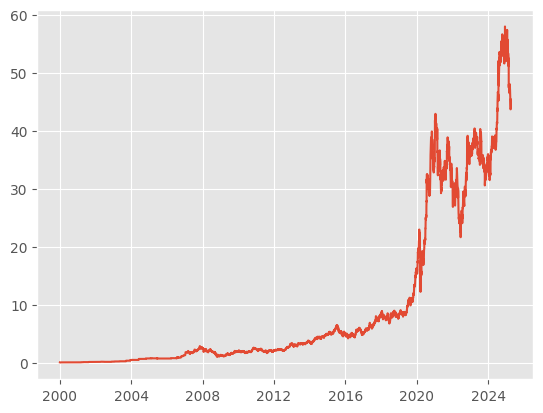

In [8]:
#plt.style.use("default")
plt.style.use("ggplot")

fig, ax = plt.subplots()

ax.plot(cotacoes.index, cotacoes.values)

In [7]:
!pip install -q mplcyberpunk

In [9]:
import mplcyberpunk
import matplotlib.ticker as mtick

plt.style.use("cyberpunk")

[*********************100%***********************]  2 of 2 completed


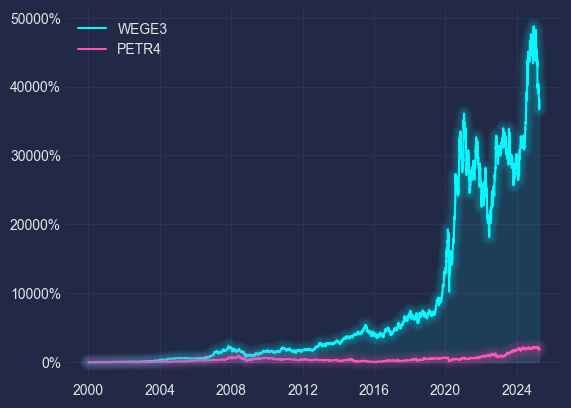

In [11]:
cotacoes = yf.download(["WEGE3.SA", "PETR4.SA"])['Close']

retornos = cotacoes.pct_change().dropna()

retornos_acum = (1 + retornos).cumprod() - 1

fig, ax = plt.subplots()

ax.plot(retornos_acum.index, retornos_acum['WEGE3.SA'], label = "WEGE3")
ax.plot(retornos_acum.index, retornos_acum['PETR4.SA'], label = "PETR4")
ax.legend()
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))

mplcyberpunk.add_glow_effects()

plt.show()

[*********************100%***********************]  4 of 4 completed


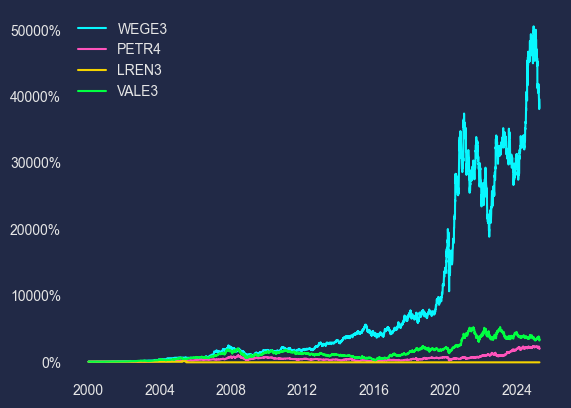

In [13]:
acoes = ["WEGE3.SA", "PETR4.SA", "LREN3.SA", "VALE3.SA"]

cotacoes = yf.download(acoes)['Close']

retornos = cotacoes.pct_change().dropna()

retornos_acum = (1 + retornos).cumprod() - 1

fig, ax = plt.subplots()

for acao in acoes:

    ax.plot(retornos_acum.index, retornos_acum[acao], label = acao.replace(".SA", ""))

ax.legend()
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))
ax.grid(False)


plt.show()

# Exercícios

* Exercício 100: Puxe as cotações de 4 ações a sua escolha, calcule a correlação de 12 meses das ações com o ibovespa e plote um gráfico dessas correlações, escolhendo as cores das linhas a sua escolha.

* Exercício 101: Crie o mesmo gráfico utilizando o estilo Cyberpunk. 

[*********************100%***********************]  3 of 3 completed
[*********************100%***********************]  1 of 1 completed


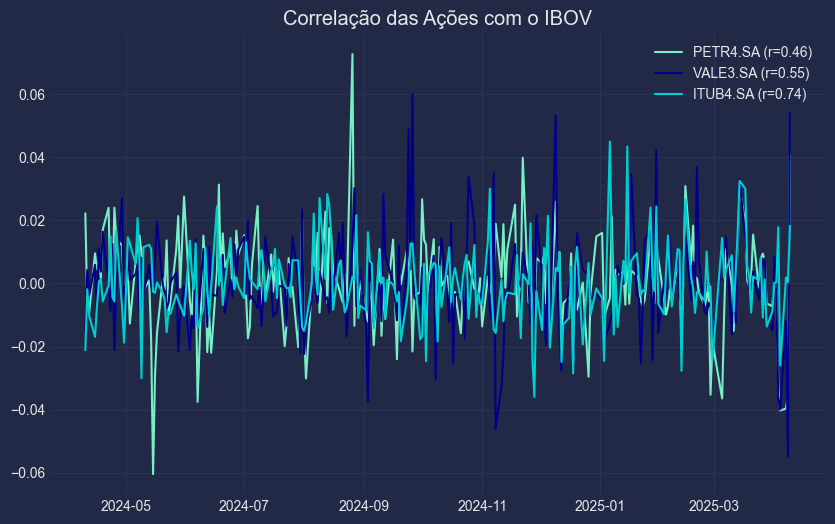

In [19]:
import yfinance as yf
import matplotlib.pyplot as plt

acoes = ["PETR4.SA", "VALE3.SA", "ITUB4.SA"]
ibov = "^BVSP"

# Baixando os dados
cotacoes = yf.download(acoes, period="12mo")["Close"]
ibov_cotacoes = yf.download(ibov, period="12mo")["Close"]

# Calculando os retornos
retornos_a = cotacoes.pct_change()
retornos_ibov = ibov_cotacoes.pct_change()

# Plotando
fig, ax = plt.subplots(figsize=(10, 6))
cores = ['#76EEC6', '#00008B', '#00CDCD']

for i, empresa in enumerate(acoes):
    retorno_empresa = retornos_a[empresa]
    
    # Criar um DataFrame com os dois ativos
    dados_combinados = pd.concat([retorno_empresa, retornos_ibov], axis=1).dropna()
    dados_combinados.columns = ["empresa", "ibov"]
    
    correlacao = dados_combinados["empresa"].corr(dados_combinados["ibov"])
    
    ax.plot(dados_combinados.index, dados_combinados["empresa"], label=f"{empresa} (r={correlacao:.2f})", color=cores[i])

ax.grid(True)
ax.set_title("Correlação das Ações com o IBOV")
ax.legend()
plt.show()


In [4]:
import matplotlib.dates as mdate

[*********************100%***********************]  5 of 5 completed
C:\Users\pedro\AppData\Local\Temp\ipykernel_14196\3000668843.py:7: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  retornos = cotacoes.pct_change().dropna()


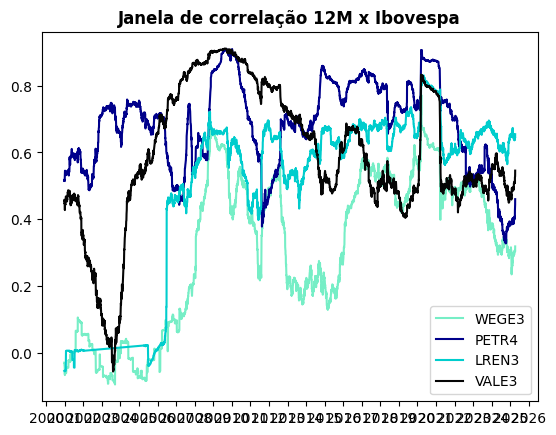

In [5]:
plt.style.use("default")

acoes = ["WEGE3.SA", "PETR4.SA", "LREN3.SA", "VALE3.SA", "^BVSP"]

cotacoes = yf.download(acoes)['Close']

retornos = cotacoes.pct_change().dropna()

fig, ax = plt.subplots()

acoes.remove("^BVSP")

cores = ['#76EEC6', '#00008B', '#00CDCD', '#050505']

for i, acao in enumerate(acoes):
    
    janela_cor = retornos[acao].rolling(252).corr(retornos["^BVSP"]).dropna()
    ax.plot(janela_cor.index, janela_cor.values, label = acao.replace(".SA", ""), color = cores[i])

ax.xaxis.set_major_locator(mdate.YearLocator(1))
ax.legend()
ax.grid(False)
ax.set_title("Janela de correlação 12M x Ibovespa", fontweight ="bold")


plt.show()

In [9]:
#gabarito 101

plt.style.use("cyberpunk")

acoes = ["WEGE3.SA", "PETR4.SA", "LREN3.SA", "VALE3.SA", "^BVSP"]

cotacoes = yf.download(acoes)['Close']

retornos = cotacoes.pct_change().dropna()

fig, ax = plt.subplots()

acoes.remove("^BVSP")

for i, acao in enumerate(acoes):
    
    janela_cor = retornos[acao].rolling(252).corr(retornos["^BVSP"]).dropna()
    ax.plot(janela_cor.index, janela_cor.values, label = acao.replace(".SA", ""))

ax.xaxis.set_major_locator(mdate.YearLocator(1))
ax.legend()
ax.grid(False)
ax.set_title("Janela de correlação 12M x Ibovespa", fontweight ="bold")


plt.show()

OSError: 'cyberpunk' is not a valid package style, path of style file, URL of style file, or library style name (library styles are listed in `style.available`)

# Mundo 10

Gráfico de barras